# **Import thư viện**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn import metrics
from scipy.spatial import ConvexHull
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import data**

In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Phân tích số liệu/Kaggle/Mall_Customers.csv')

Chi tiết bộ dữ liệu xem tại: [Mall_Customers](https://www.kaggle.com/datasets/shwetabh123/mall-customers)

**Thông tin bộ dữ liệu**

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data_raw.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data_raw

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


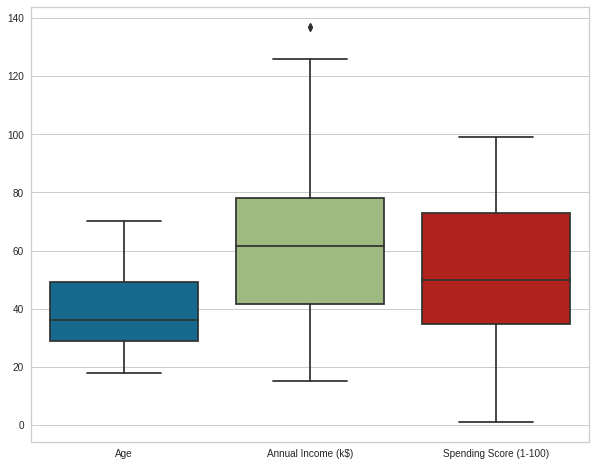

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data_raw[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.savefig("Boxplot.png")
plt.show()


In [ ]:
data = data_raw.copy()

In [ ]:
data = data.drop(["CustomerID"], axis = 1)
data = data.drop(["Genre"], axis = 1)
data = data.dropna()
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


**Loại bỏ Outliers**

In [ ]:
for column in data.columns[:3]:
  Selected_column = data[column]
  q1=Selected_column.quantile(0.25)
  q3=Selected_column.quantile(0.75)
  iqr = q3 - q1 
  upper_limit = q3 + 1.5 * iqr
  lower_limit = q1 - 1.5 * iqr        
  outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index 
  print(outlierss)
  data.drop(index = outlierss, inplace=True) 

Int64Index([], dtype='int64')
Int64Index([198, 199], dtype='int64')
Int64Index([], dtype='int64')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     198 non-null    int64
 1   Annual Income (k$)      198 non-null    int64
 2   Spending Score (1-100)  198 non-null    int64
dtypes: int64(3)
memory usage: 14.3 KB


# **Phân cụm K-means**

**Phương pháp Elbow**

In [ ]:
def ElbowMethod(x) -> None:
  km = KMeans(random_state=42, init = 'k-means++', max_iter = 300)
  visualizer = KElbowVisualizer(km, k=(2,10))
  
  visualizer.fit(x)        # Fit the data to the visualizer
  plt.savefig("elbow.png")
  visualizer.show()        # Finalize and render the figure

**Chỉ số Silhouette**

In [ ]:
def SilhoutteIndex(x) -> None:
  silhouette_avg = []
  for k in range(2,10):
      clusterer = KMeans(n_clusters=k, random_state=42, init = 'k-means++', max_iter = 300)
      clusterer.fit_predict(x)
      score = silhouette_score(x, clusterer.labels_, metric='euclidean')
      silhouette_avg.append(score)
      print("For n_clusters =", k,"The average silhouette_score is :", score)
  plt.plot([2, 3, 4, 5, 6, 7, 8, 9], silhouette_avg,'bx-')
  plt.xlabel('K') 
  plt.ylabel('Average silhouette score') 
  plt.savefig("silhouette score.png")
  plt.show()

**Trực quan hóa phân cụm**

In [76]:
def visualization(feature1, feature2, kmeansModel, centers, dataTraining) -> None:
  colors = ['black', 'blue', 'red', 'green', 'purple']

  fig, ax = plt.subplots(1, figsize=(10,8))

  plt.scatter(data[feature1], 
              data[feature2], 
              c=kmeansModel.labels_, s=100, edgecolors='red', linewidths=1)

  y_kmeans = kmeansModel.fit_predict(dataTraining)
  plt.scatter(centers[:,0], centers[:,1], color='white', marker='o', s=300, edgecolor = 'k', linewidth = 1.5) 

  for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=100, edgecolor="k", linewidth = 1.5)
  # draw enclosure
  for i in np.unique(kmeansModel.labels_):
      points = data[y_kmeans == i][[feature1, feature2]].values
      # get convex hull
      hull = ConvexHull(points)
      # get x and y coordinates
      # repeat last point to close the polygon
      x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
      y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])
      # plot shape
      plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
  plt.xlabel(feature1)
  plt.ylabel(feature2)
  plt.title(str(np.unique(kmeansModel.labels_).size) + ' Cluster K-Means')
  plt.savefig(str(np.unique(kmeansModel.labels_).size) + " cluster K-means.png")
  plt.show()

**Phân cụm K-means với 2 features "Annual Income (k$)" và "Spending Score (1-100)"**

In [ ]:
Annual_Spending = data.iloc[:, [1, 2]].values

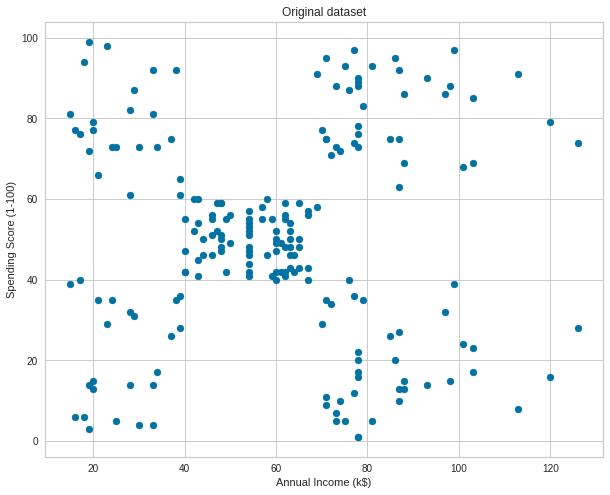

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(Annual_Spending[:, 0], Annual_Spending[:, 1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Original dataset")
plt.savefig("original dataset.png")
plt.show()

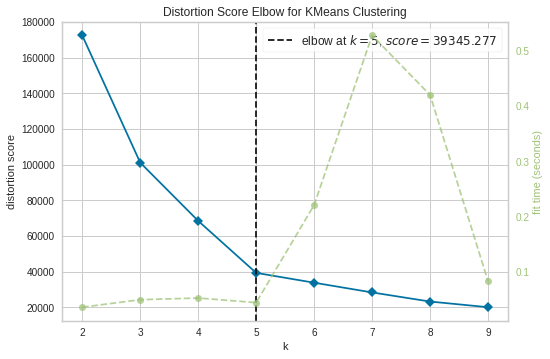

In [ ]:
ElbowMethod(Annual_Spending)

For n_clusters = 2 The average silhouette_score is : 0.29900633510734437
For n_clusters = 3 The average silhouette_score is : 0.46541758070184547
For n_clusters = 4 The average silhouette_score is : 0.497441782578338
For n_clusters = 5 The average silhouette_score is : 0.5606825090788626
For n_clusters = 6 The average silhouette_score is : 0.4650105805464042
For n_clusters = 7 The average silhouette_score is : 0.4560439280820137
For n_clusters = 8 The average silhouette_score is : 0.45565992348694245
For n_clusters = 9 The average silhouette_score is : 0.45454114645963273


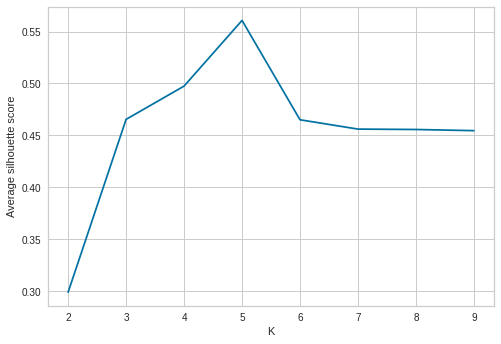

In [ ]:
SilhoutteIndex(Annual_Spending)

In [ ]:
k_means_2features_5clusters = KMeans(n_clusters = 5, init = 'k-means++', max_iter=300)
k_means_2features_5clusters.fit(Annual_Spending)

KMeans(n_clusters=5)

In [ ]:
centers_2features_5clusters = k_means_2features_5clusters.cluster_centers_

centers_2features_5clusters

array([[55.0875    , 49.7125    ],
       [25.72727273, 79.36363636],
       [85.21052632, 82.10526316],
       [26.30434783, 20.91304348],
       [86.34285714, 17.57142857]])

In [ ]:
df = pd.DataFrame(centers_2features_5clusters, columns = ["Annual Income (k$)", "Spending Score (1-100)"])
df

,Annual Income (k$),Spending Score (1-100)
0,55.087500,49.712500
1,25.727273,79.363636
2,85.210526,82.105263
3,26.304348,20.913043
4,86.342857,17.571429


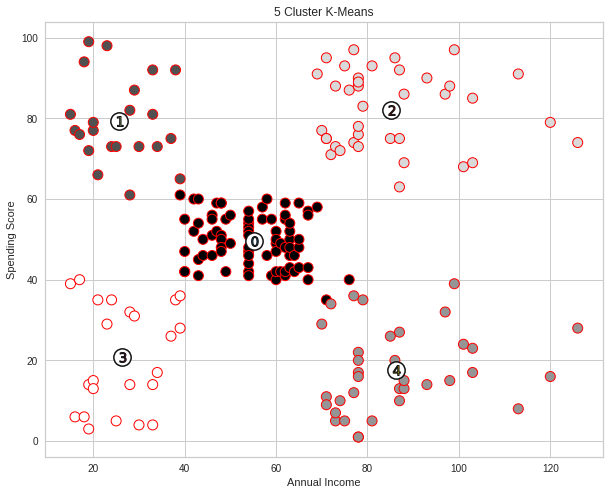

In [56]:
plt.figure(figsize=(10, 8))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means_2features_5clusters.labels_, s=100, edgecolors='red', linewidths=1)

plt.scatter(centers_2features_5clusters[:,0], centers_2features_5clusters[:,1], c='white', marker='o', s=300, alpha = 1, edgecolor = 'k', linewidth = 1.5) 
for i, c in enumerate(centers_2features_5clusters):
  plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=100, edgecolor="k", linewidth = 1)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')
plt.show()

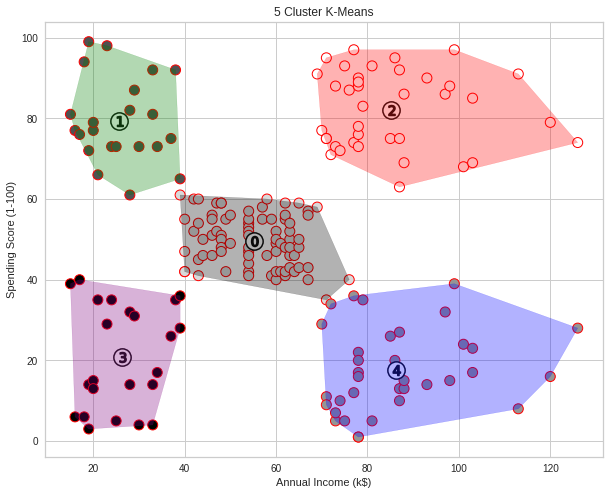

In [77]:
visualization('Annual Income (k$)', 'Spending Score (1-100)', k_means_2features_5clusters, centers_2features_5clusters, Annual_Spending)

**Trên thực tế, các đơn vị kinh doanh trong việc phân
cụm khách hàng thường được phân loại thành 3
loại: khách hàng nóng, khách hàng ấm, khách hàng
lạnh. Cho nên tiếp tục tiến hành thử
phân cụm với số cụm là k = 3**

In [78]:
k_means_2features_3clusters = KMeans(n_clusters=3, init='k-means++', max_iter=300)
k_means_2features_3clusters.fit(Annual_Spending)

KMeans(n_clusters=3)

In [79]:
centers_2features_3clusters = k_means_2features_3clusters.cluster_centers_

centers_2features_3clusters

array([[85.64864865, 18.64864865],
       [44.15447154, 49.82926829],
       [85.21052632, 82.10526316]])

In [80]:
df = pd.DataFrame(centers_2features_3clusters, columns = ["Annual Income (k$)", "Spending Score (1-100)"])
df

,Annual Income (k$),Spending Score (1-100)
0,85.648649,18.648649
1,44.154472,49.829268
2,85.210526,82.105263


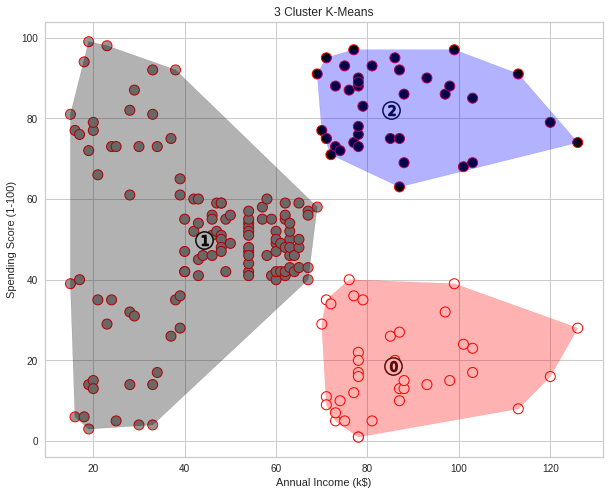

In [81]:
visualization('Annual Income (k$)', 'Spending Score (1-100)', k_means_2features_3clusters, centers_2features_3clusters, Annual_Spending)

**Phân cụm K-means với 2 features "Age" và "Spending Score (1-100)"**

In [82]:
scaler = StandardScaler()
var = ["Age", "Spending Score (1-100)"]
data_scaler = data.copy()
data_scaler[var] = scaler.fit_transform(data_scaler[var])

In [83]:
Age_Spending = data_scaler.iloc[:, [0, 2]].values

In [84]:
k_means_2features_3clusters.fit(Age_Spending)

KMeans(n_clusters=3)

In [85]:
centers_2features_3clusters = scaler.inverse_transform(k_means_2features_3clusters.cluster_centers_)
centers_2features_3clusters

array([[56.08064516, 40.30645161],
       [28.67857143, 73.36904762],
       [35.03846154, 24.55769231]])

In [86]:
df = pd.DataFrame(centers_2features_3clusters, columns = ["Age", "Spending Score (1-100)"])
df

,Age,Spending Score (1-100)
0,56.080645,40.306452
1,28.678571,73.369048
2,35.038462,24.557692


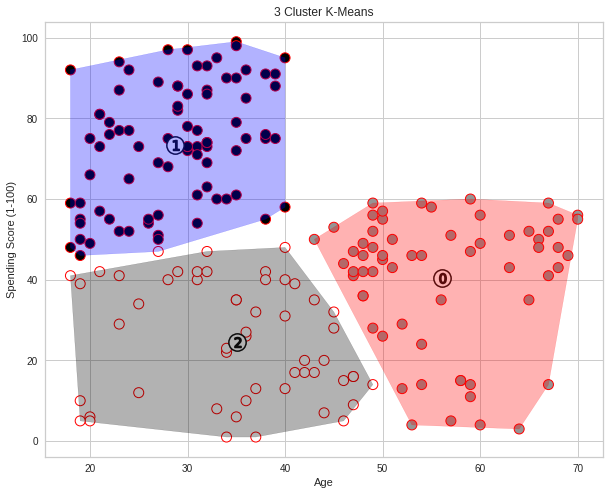

In [89]:
visualization('Age', 'Spending Score (1-100)', k_means_2features_3clusters, centers_2features_3clusters, Age_Spending)

**Phân cụm K-means với 3 features "Age", "Annual Income" và "Spending Score (1-100)"**

In [90]:
scaler = StandardScaler()
var = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
data_scaler = data.copy()
data_scaler[var] = scaler.fit_transform(data_scaler[var])

In [91]:
Age_Income_Spending = data_scaler.iloc[:, [0, 1, 2]].values

In [92]:
k_means_3features_3clusters = KMeans(n_clusters=3, init='k-means++', max_iter=300)
k_means_3features_3clusters.fit(Age_Income_Spending)

KMeans(n_clusters=3)

In [93]:
centers_3features_3clusters = scaler.inverse_transform(k_means_3features_3clusters.cluster_centers_)
centers_3features_3clusters

array([[25.85074627, 42.23880597, 54.26865672],
       [50.98913043, 61.9673913 , 33.9673913 ],
       [32.94871795, 84.79487179, 81.48717949]])

In [94]:
df = pd.DataFrame(centers_3features_3clusters, columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"])
df

,Age,Annual Income (k$),Spending Score (1-100)
0,25.850746,42.238806,54.268657
1,50.989130,61.967391,33.967391
2,32.948718,84.794872,81.487179


In [96]:
Age_Income_Spending = scaler.inverse_transform(Age_Income_Spending)

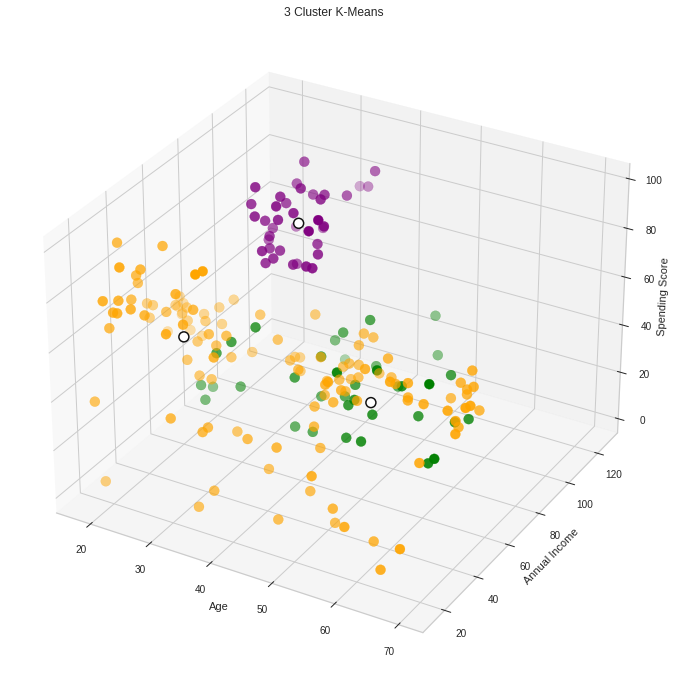

In [97]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
y_kmeans_3features_3clusters = k_means_3features_3clusters.fit_predict(Age_Income_Spending)

colors = ['purple', 'orange', 'green', 'red', 'black', 'blue']
for i in range(6):
  ax.scatter3D(Age_Income_Spending[y_kmeans_3features_3clusters == i, 0], Age_Income_Spending[y_kmeans_3features_3clusters == i, 1],
               Age_Income_Spending[y_kmeans_3features_3clusters == i, 2], c = colors[i], marker = 'o', s = 100)

ax.scatter3D(centers_3features_3clusters[:,0], centers_3features_3clusters[:,1], centers_3features_3clusters[:,2], c='white', marker='o', edgecolor = 'k', alpha=1, linewidth = 1.5, s = 100) 

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('3 Cluster K-Means')
plt.savefig("3 features.png")
plt.show()